In [257]:
import pandas as pd
import seaborn as sns
reconstr = pd.read_csv('datas\prikaz_reconstr.csv')

In [2]:
reconstr.head()

,№,district,city_place,adress
0,1,САО,Бескудниковский,"Бескудниковский бульв., д.48 к.5"
1,2,САО,Бескудниковский,"Бескудниковский бульв., д.48 к.7"
2,3,САО,Бескудниковский,"Дмитровское шоссе, д.95 к.2"
3,4,САО,Бескудниковский,"Дмитровское шоссе, д.99 к.2"
4,5,САО,Бескудниковский,"Коровинское шоссе, д.4 к.1"


In [3]:
reconstr.drop_duplicates()
reconstr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 4 columns):
№             840 non-null int64
district      840 non-null object
city_place    840 non-null object
adress        840 non-null object
dtypes: int64(1), object(3)
memory usage: 26.4+ KB


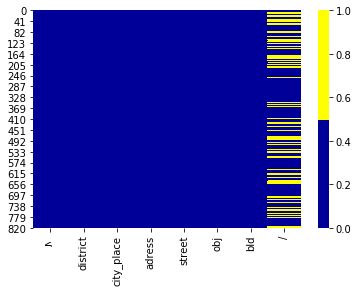

In [92]:
# warm map of the new and the prev. values
cols = reconstr.columns[:30]
colours = ['#000099', '#ffff00'] 
sns.heatmap(reconstr[cols].isnull(), cmap=sns.color_palette(colours))

In [5]:
reconstr_dedupped = reconstr.drop('adress', axis=1).drop_duplicates()
# comparing
print(reconstr.shape)
print(reconstr_dedupped.shape)

(840, 4)
(840, 3)


In [6]:
reconstr['adress'] = reconstr['adress'].str.lower()
reconstr['adress'].value_counts(dropna=False)

рязанский просп., д.17        1
карельский бульв., д.14/16    1
камова ул., д.24 к.1          1
ставропольская ул., д.5а      1
щелковское шоссе, д.92 к.6    1
                             ..
бутлерова ул., д.36 к.1       1
никитинская ул., д.21 к.3     1
нагорная ул., д.7 к.4         1
мира просп., д.135а           1
перекопская ул., д.27 к.2     1
Name: adress, Length: 840, dtype: int64

In [11]:
# trying sepatare via columns:
import re
for column in reconstr['adress']:
    reconstr['adress'] = reconstr['adress'].str.replace(',','')
reconstr['street'] = None; reconstr['obj'] = None; reconstr['bld'] = None; reconstr['/'] = None;
for i, s in enumerate(reconstr['adress']):
    street = re.findall('[а-яА-Я]*', s)[0].strip()
    reconstr.loc[i,('street')] = street
    for col, val in zip(['obj', 'bld', '/'], s[len(street):].strip().split(' ')):
        reconstr.loc[i,(col)] = val
reconstr.head(5)

,№,district,city_place,adress,street,obj,bld,/
0,1,САО,Бескудниковский,бескудниковский бульв. д.48 к.5,бескудниковский,бульв.,д.48,к.5
1,2,САО,Бескудниковский,бескудниковский бульв. д.48 к.7,бескудниковский,бульв.,д.48,к.7
2,3,САО,Бескудниковский,дмитровское шоссе д.95 к.2,дмитровское,шоссе,д.95,к.2
3,4,САО,Бескудниковский,дмитровское шоссе д.99 к.2,дмитровское,шоссе,д.99,к.2
4,5,САО,Бескудниковский,коровинское шоссе д.4 к.1,коровинское,шоссе,д.4,к.1


In [12]:
# check unique
reconstr['bld'].unique()

array(['д.48', 'д.95', 'д.99', 'д.4', 'д.8', 'д.1', 'д.3', 'д.5', 'д.6',
       'д.49', 'д.51', 'д.62', 'пер.', 'д.', 'д.31', 'д.33', 'д.41',
       'д.43/70', 'д.23', 'д.66', 'д.68', 'д.11', 'д.9/25', 'д.141',
       'д.143', 'д.9', 'д.10', 'д.14/16', 'д.18', 'д.26', 'д.2', 'д.22',
       'д.22б', 'д.24', 'д.24б', 'д.29', 'д.29а', 'пр.', 'ул.', '',
       'д.32', 'д.36', 'д.55', 'д.14', 'д.15а', 'д.13', 'д.12', 'д.17',
       'д.28', 'д.44', 'д.37а', 'д.37б', 'д.39', 'д.7', 'д.135а', 'д.7/1',
       'д.19', 'д.20', 'д.16', 'д.10а', 'бульв.', 'д.71/25', 'д.70',
       'д.30', 'д.34', 'д.40', 'д.42', 'д.46', 'д.52', 'д.64', 'д.74',
       'д.11/38', 'д.15', 'д.35', 'д.37', 'д.43', 'д.47', 'д.53', 'д.57',
       'д.63', 'д.101', 'д.103', 'д.89', 'д.93', 'д.97', 'д.21', 'д.5а',
       'д.61', 'д.25', 'д.27', 'д.12/23', 'парковая', 'д.50', 'д.92',
       'д.56/72', 'д.58', 'д.60', 'д.62/59', 'д.3а', '3-я', '5-я',
       'д.44а', 'д.45', 'д.91', 'квартал', 'д.107', 'д.109', 'д.155',
       

In [13]:
reconstr['obj'].unique()

array(['бульв.', 'шоссе', 'ул.', '1-й', '2-й', '3-й', '4-й', 'генерала',
       'пр.', 'вишневского', 'летчика', 'академика', 'просп.', 'маршала',
       '16-я', '3-я', '5-я', '7-я', '1-я', '2-я', 'б.', 'люксембург',
       'озеро', 'химушина', '15-я', '9-я', '11-я', 'горы', 'полетаева',
       'ленинцев', 'ср.', 'пер.', 'поля', 'лет', '-зуевский', 'верхн.',
       'кварт.90а', 'романова', 'пос.', 'м.', 'наб.', '-маклая',
       'архитектора', 'зорь', 'алексеева', 'поливановой', '1980',
       'кожиной', 'курина', 'дундича', 'панфиловцев'], dtype=object)

In [14]:
len(reconstr['bld'].unique())

155

In [15]:
for column in reconstr['bld']:
    reconstr['bld'] = reconstr['bld'].str.replace('д.','')
    reconstr['bld'] = reconstr['bld'].str.replace('к.','')
    reconstr['bld'] = reconstr['bld'].str.replace('(митино)','')
    reconstr['bld'] = reconstr['bld'].str.replace('()','')
    reconstr['bld'] = reconstr['bld'].str.replace('0','')
reconstr['bld'] = reconstr['bld'].fillna(0)
reconstr['bld'].unique()
# not beautiful set

array(['48', '95', '99', '4', '8', '1', '3', '5', '6', '49', '51', '62',
       'пер.', '', '31', '33', '41', '43/7', '23', '66', '68', '11',
       '9/25', '141', '143', '9', '14/16', '18', '26', '2', '22', '22б',
       '24', '24б', '29', '29а', 'пр.', 'ул.', '32', '36', '55', '14',
       '15а', '13', '12', '17', '28', '44', '37а', '37б', '39', '7',
       '135а', '7/1', '19', '16', '1а', 'бульв.', '71/25', '34', '42',
       '46', '52', '64', '74', '11/38', '15', '35', '37', '43', '47',
       '53', '57', '63', '89', '93', '97', '21', '5а', '61', '25', '27',
       '12/23', 'парвая', '92', '56/72', '58', '62/59', '3а', '3-я',
       '5-я', '44а', '45', '91', 'артал', '155', '161', '163', '26/6',
       '17а', '4а', '5-9', '4/117', '5/115', '18/18', '111', '113', '119',
       '121/1', '125', '54', '2/123', 'оября', '7а', '7б', '9/1', '9а',
       '71', '76', '78', '83', '83а', '88', '94', '5б', '21а', '2в',
       '143в', '145', '6г', '27/14', '85', '123а', '1-й', '82', '86',
     

In [18]:
# just check via tuple
df = pd.read_csv('datas\prikaz_reconstr.csv')
pat = r'(?P<str>.+(?=\bapt|\bunit)|.+(?=#)|.+)?'
sd = df.adress.str.extract(pat)
sd.tail()

,str
835,"Героев Панфиловцев ул., д.47 к.1"
836,"Героев Панфиловцев ул., д.47 к.2"
837,"Героев Панфиловцев ул., д.49 к.1"
838,"Героев Панфиловцев ул., д.49 к.2"
839,"Свободы ул., д.69"


let`s try with slices

In [54]:
s = "Олеко Дундича ул., д.45 к.1"
print(s.split(',')[0])
b = (s.split('д.')[1])
h = (b.split(' ')[0])
m = (b.split('к.')[1])
print(h)
print(m)
# works

Олеко Дундича ул.
45
1


In [168]:
def adress(source):
    try:
        for s in source:
            print(s.split(',')[0])                                 
    except IndexError:
        print('')

In [90]:
def house(source):
    try:
        for s in source:
            b = (s.split('д.')[1])
            print(b.split(' ')[0])                      
    except IndexError:
        print('')

In [160]:
def obj(source):
    try:
        for s in source:
            a = (s.split(' к.')[-1])
            if len(a) <= 2:
                print(a)
            else:
                print('')
    except IndexError:
            print('')

In [210]:
test = pd.read_csv('datas\prikaz_reconstr.csv')
test.head()

,№,district,city_place,adress
0,1,САО,Бескудниковский,"Бескудниковский бульв., д.48 к.5"
1,2,САО,Бескудниковский,"Бескудниковский бульв., д.48 к.7"
2,3,САО,Бескудниковский,"Дмитровское шоссе, д.95 к.2"
3,4,САО,Бескудниковский,"Дмитровское шоссе, д.99 к.2"
4,5,САО,Бескудниковский,"Коровинское шоссе, д.4 к.1"


In [211]:
test['district'].unique()

array(['САО', 'СВАО', 'ВАО', 'ЮВАО', 'ЮАО', 'ЮЗАО', 'ЗАО', 'СЗАО'],
      dtype=object)

In [221]:
pivot = test[test['district'].isin(['САО', 'СВАО', 'ВАО', 'ЮВАО', 'ЮАО', 'ЮЗАО', 'ЗАО', 'СЗАО'])].pivot_table(
index = ['city_place'], columns=['district'], margins=True).fillna(0)
pivot

№                                                  \
district              ВАО    ЗАО   САО   СВАО   СЗАО    ЮАО   ЮВАО   ЮЗАО   
city_place                                                                  
Академический         0.0    0.0   0.0    0.0    0.0    0.0    0.0  636.5   
Алексеевский          0.0    0.0   0.0   85.0    0.0    0.0    0.0    0.0   
Бабушкинский          0.0    0.0   0.0   94.0    0.0    0.0    0.0    0.0   
Бескудниковский       0.0    0.0   5.5    0.0    0.0    0.0    0.0    0.0   
Бирюлево Восточное    0.0    0.0   0.0    0.0    0.0  554.5    0.0    0.0   
...                   ...    ...   ...    ...    ...    ...    ...    ...   
Южное Медведково      0.0    0.0   0.0  148.5    0.0    0.0    0.0    0.0   
Южнопортовый          0.0    0.0   0.0    0.0    0.0    0.0  548.0    0.0   
Ярославский           0.0    0.0   0.0  152.0    0.0    0.0    0.0    0.0   
Ясенево               0.0    0.0   0.0    0.0    0.0    0.0    0.0  710.5   
All                 262.5  767.0  42.0  118.0  831.5  590.5  461.5  671.0   

                           
district              All  
city_place                 
Академический       636.5  
Алексеевский         85.0  
Бабушкинский         94.0  
Бескудниковский       5.5  
Бирюлево Восточное  554.5  
...                   ...  
Южное Медведково    148.5  
Южнопортовый        548.0  
Ярославский         152.0  
Ясенево             710.5  
All                 420.5  

[68 rows x 9 columns]

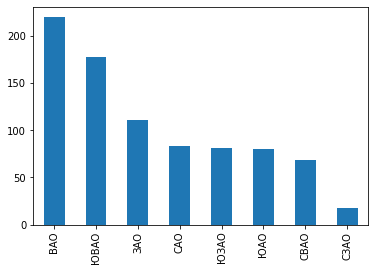

In [237]:
test['district'].value_counts().plot(kind='bar')

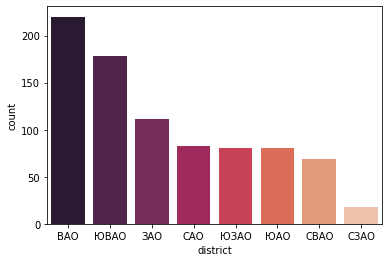

In [287]:
sns.countplot(x = 'district', data = test, palette="rocket", order = test['district'].value_counts().index)